In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/kaggle/input/automotive-vehicles-engine-health-dataset/engine_data.csv")

# Getting overall information about the dataset

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
cols = df.columns[:-1]

# Plotting the data using Pairplot

In [ ]:
sns.pairplot(df, vars = cols, hue='Engine Condition')

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
mms = MinMaxScaler()
x = mms.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Preparing functions to decrease the amount of manual work during training and testing of models

In [ ]:
def evaluate(model, name, roud=2, train=False):
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    score *= 100
    score = round(score, roud)
    title = "{}: {}%".format(name, score)
    cm = confusion_matrix(y_pred, y_test)
    if not train:
        sns.heatmap(cm, annot=True)
        plt.title(title)
        plt.show()
    else:
        print(title)

In [ ]:
def model_train_evaluate(model, name):
    model.fit(x_train, y_train)
    evaluate(model, name, 2, True)
    return model

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=50)
dtc = DecisionTreeClassifier(max_depth=100)
gnb = GaussianNB()
lgr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=25)
abc = AdaBoostClassifier(n_estimators=150, learning_rate=0.5)
svc = SVC(C=0.3)
models = [rfc, dtc, gnb, lgr, knn, abc, svc]
names = ['Random Forest Classifier', 'Decision Tree Classifier',
        'GaussianNB', 'Logistic Regression', 'KNeighborsClassifier',
        'AdaBoostClassifier', 'SVC']

# Training of models

In [ ]:
trained = []
for i, j in zip(models, names):
    trained += [model_train_evaluate(i, j)]

# Models evaluation:

## Model that is the least accuracte is 

Decision Tree Classifier

## Model that is the most accurate is 

AdaBoostClassifier

## Other models' performance

Well, the following models:

* GaussianNB
* Logistic Regression

Do not need very much of a fine-tuning and turn out to be more stable and accurate compared to Tree Algorithms

KNN and SVC are almost going toe-to-toe.

Even though these two algorithms are very different in terms of complexity and techniques involved.

* SVC - requires quadratic programming optimization algorithms in order to find Lagrangian multipliers so that we can find weights for separating hyperplane

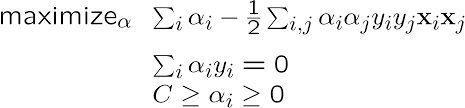

* KNN - lazy algorithm that simply memorizes the training dataset and allocated data on the principle of which class is the most prevalent out of K-neighbors(that is why it is **K** Neighbors)

![KNN](https://vatsalparsaniya.github.io/ML_Knowledge/_images/KNN.png)

## The most stable models

* KNN
* GaussianNB

GaussianNB is one of the most stable ones because it uses probabilistic formula:
![gnb](https://iq.opengenus.org/content/images/2020/02/Screenshot_6.jpg)

These algorithms do not use numerical optimization techniques like others. These two models are prone to be more statistical learning.

P.S.

Correct me if I am wrong, please - it would help me improve and move higher.